## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset
data_df = pd.read_csv("Linear_regression_dataset")

--2024-12-09 11:47:00--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.199.113, 74.125.199.100, 74.125.199.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.199.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-12-09 11:47:00--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  

In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
l=[]                                          # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
for i in data_df['date']:
  l.append(int(i.replace("T000000","")))           # Create a numpy array which does not have "id" field
data_df['date']=np.array(l).reshape((21613,1))
data_array=np.array(data_df.drop('id',axis=1))
assert (data_array.shape == (21613,20))
data_array

array([[ 2.0141013e+07,  2.2190000e+05,  3.0000000e+00, ...,
        -1.2225700e+02,  1.3400000e+03,  5.6500000e+03],
       [ 2.0141209e+07,  5.3800000e+05,  3.0000000e+00, ...,
        -1.2231900e+02,  1.6900000e+03,  7.6390000e+03],
       [ 2.0150225e+07,  1.8000000e+05,  2.0000000e+00, ...,
        -1.2223300e+02,  2.7200000e+03,  8.0620000e+03],
       ...,
       [ 2.0140623e+07,  4.0210100e+05,  2.0000000e+00, ...,
        -1.2229900e+02,  1.0200000e+03,  2.0070000e+03],
       [ 2.0150116e+07,  4.0000000e+05,  3.0000000e+00, ...,
        -1.2206900e+02,  1.4100000e+03,  1.2870000e+03],
       [ 2.0141015e+07,  3.2500000e+05,  2.0000000e+00, ...,
        -1.2229900e+02,  1.0200000e+03,  1.3570000e+03]])

Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:
mean = np.mean(data_array, axis=0)
std = np.std(data_array, axis=0)
data_array_norm = (data_array - mean)/std
print(data_array_norm)

[[-0.65134259 -0.86671733 -0.39873715 ... -0.30607896 -0.9433552
  -0.26071541]
 [-0.60716342 -0.00568792 -0.39873715 ... -0.74634143 -0.43268619
  -0.18786773]
 [ 1.42507844 -0.98084935 -1.47395936 ... -0.13565477  1.07013975
  -0.17237524]
 ...
 [-0.73925012 -0.37586519 -1.47395936 ... -0.60432128 -1.41025258
  -0.39414129]
 [ 1.40050941 -0.38158814 -0.39873715 ...  1.02891048 -0.8412214
  -0.42051149]
 [-0.65089178 -0.58588173 -1.47395936 ... -0.60432128 -1.41025258
  -0.41794772]]


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
labels = data_df['price']                                                                                                            # extract the price column from data
x_array_norm = np.delete(data_array_norm,1,axis=1)                                                                                                     # delete the price column from data_array_norm. Hint: use np.delete()
x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  m=y_pred.shape[0]
  squared_error=np.sum((y_pred-y_true)**2)
  mse= squared_error/m
  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """
  m,n = x.shape
  y_pred = np.dot(x,a)+b
  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  da = -(2/m)*np.dot(x.T,y_true-yp)              # write code to calculate derivative of loss with respect to a
  db = -(2/m)*np.sum(y_true-yp)            # write code to calculate derivative of loss with respect to b
  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.ones(n)                                       # initialize a- weights and b- bias
  b = 0
  for i in range(epochs):
    da=gradient(x,a,b,y_true)[0]
    db=gradient(x,a,b,y_true)[1]
    a-=learning_rate*da
    b-=learning_rate*db
    y_pred = y(x,a,b)
    l_mse =  loss(y_pred,y_true)                               # calculate loss at this point
    loss_mse.append(l_mse)
    print("Epoch ",i+1," Completed!","loss = ",l_mse)
  print("Training completed!!")
  assert(a.shape==(n,))
  return (loss_mse,a,b)

### **Training**

In [ ]:
epochs = 1000       # tweak this!!!
learn_rate = 0.01         # choose learning rate wisely otherwise loss may diverge!!
train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

Epoch  1  Completed! loss =  397182252347.69806
Epoch  2  Completed! loss =  375661914086.5015
Epoch  3  Completed! loss =  356345658886.54816
Epoch  4  Completed! loss =  338889395101.00275
Epoch  5  Completed! loss =  323012470673.93225
Epoch  6  Completed! loss =  308485402011.24335
Epoch  7  Completed! loss =  295120009144.39465
Epoch  8  Completed! loss =  282761483276.98126
Epoch  9  Completed! loss =  271282006283.6468
Epoch  10  Completed! loss =  260575616760.06223
Epoch  11  Completed! loss =  250554077444.34695
Epoch  12  Completed! loss =  241143547167.50748
Epoch  13  Completed! loss =  232281899289.35236
Epoch  14  Completed! loss =  223916559719.7685
Epoch  15  Completed! loss =  216002762624.37262
Epoch  16  Completed! loss =  208502141981.16885
Epoch  17  Completed! loss =  201381593264.3195
Epoch  18  Completed! loss =  194612352463.6627
Epoch  19  Completed! loss =  188169250031.16687
Epoch  20  Completed! loss =  182030105681.30286
Epoch  21  Completed! loss =  1761

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  47281527195.576004


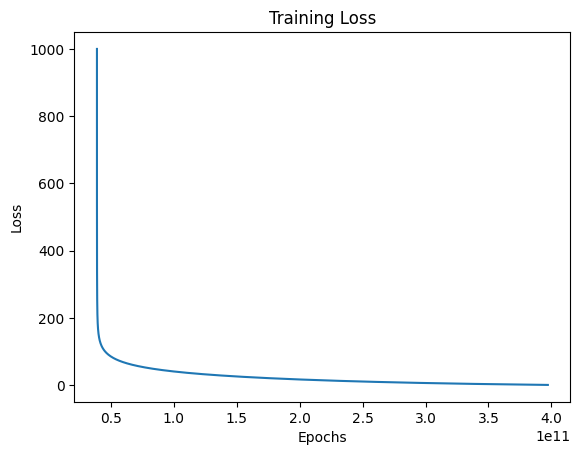

In [ ]:
y_pred=y(x_test,a,b)
test_loss=loss(y_pred,y_test)
print("Loss on test data = ",test_loss)
l=[]
# Visualization of loss
for i in range(epochs):
  l.append(i+1)
plt.plot(train_loss,l)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


Label: 0            9            4            1            3            

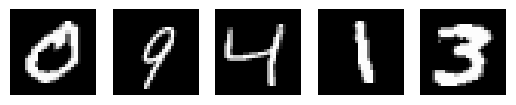

In [ ]:
# Run this cell to visualize some of the images from dataset
n = 5    # = no. of images to visualize
index = np.random.choice(x_train.shape[1],5)  # choose random index
print("Label: ",end="")
for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="            ")
plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors
x_train_flatten = x_train.flatten()  # flatten the images of training set
x_test_flatten = x_test.flatten()   # flatten the images of test set
# Divide the training data into training and validation data....
n_validation = 10000                                        # choose number of images to be used for validation
x_validation = x_train[0:n_validation]
y_validation = y_train[0:n_validation]
x_train_flatten = x_train[n_validation:60000]
y_train = y_train[n_validation:60000]

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(64, (2,2), activation="relu", input_shape = ((28,28,1))))
model.add(layers.MaxPooling2D((2,2),padding='same'))
model.add(layers.Conv2D(64,(2,2),activation="relu"))
model.add(layers.MaxPooling2D((2,2),padding='same'))
model.add(layers.Conv2D(64,(2,2),activation="relu"))
model.add(layers.MaxPooling2D((2,2),padding="same"))
model.add(layers.Conv2D(64,(2,2),activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation="softmax"))
# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 27, 27, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 64)            │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,234 (204.04 KB)

 Trainable params: 52,234 (204.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_hot_enc = to_categorical(y_train, 10)
y_validation_hot_enc = to_categorical(y_validation, 10)
y_test_hot_enc= to_categorical(y_test, 10)


#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train_flatten, y=y_train_hot_enc, batch_size=512, epochs=30, verbose='auto', validation_data=(x_validation,y_validation_hot_enc))

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 780ms/step - accuracy: 0.6482 - loss: 1.4255 - val_accuracy: 0.9500 - val_loss: 0.1660
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 776ms/step - accuracy: 0.9599 - loss: 0.1304 - val_accuracy: 0.9663 - val_loss: 0.1090
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 741ms/step - accuracy: 0.9758 - loss: 0.0743 - val_accuracy: 0.9756 - val_loss: 0.0759
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 768ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.9779 - val_loss: 0.0706
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 75s 763ms/step - accuracy: 0.9872 - loss: 0.0406 - val_accuracy: 0.9797 - val_loss: 0.0655
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 748ms/step - accuracy: 0.9908 - loss: 0.0306 - val_accuracy: 0.9801 - val_loss: 0.0705
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 74s 761ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9817 - val_loss: 0.0633
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 757ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accu

### **Evaluate**
Evaluate your model on test data.

And Show some results

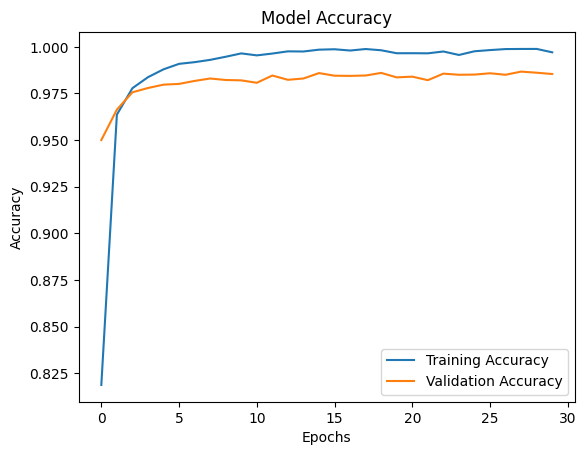

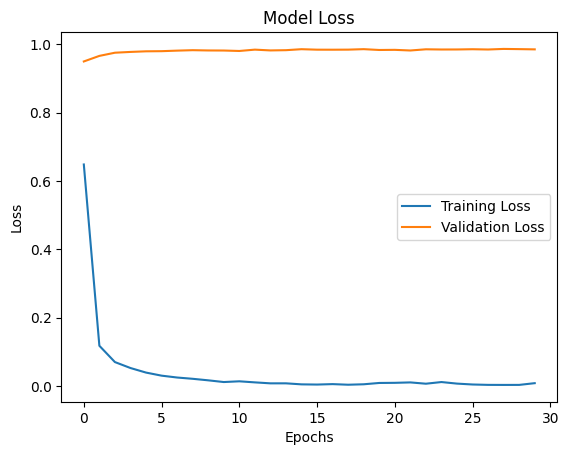

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_accuracy'],label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")
plt.show()

Lets show our results on images from testing dataset

label: 
6               9               5               2               9               

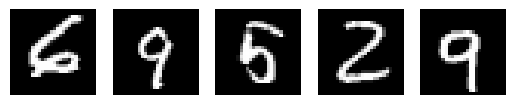

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9


In [ ]:
n = 5   # = no. of images to see predictions on
index = np.random.choice(range(len(x_test)),size=n,replace=False)  # choose random index from test data
print("label: ")
for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind], cmap="gray")
    plt.axis("off")
    print(y_test[ind],end="               ")
plt.show()
print("Predicted value: ")
# Now lets print the predictions
for i,ind in enumerate(index):
     testing=model.predict(x_test[ind].reshape(1,28,28,1))                                                           # write code to predict and print digit in image
     digit=np.argmax((testing))                                                                 # Hint: the output of the model is a 10-d vector which gives probabilties
     print(int(digit))                                                                                           # The digit in the image would be the class for which probability is hghest...